In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your synthetic dataset
df = pd.read_csv('nnpc_internship_efficiency_data.csv')
X = df[['Projects_Tracked_Closed']].values
y = df['Efficiency_Score'].values

# Normalize the feature
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print("Normalized Design Matrix (first 5 rows):\n", X_normalized[:5])

Normalized Design Matrix (first 5 rows):
 [[-0.53599255]
 [ 1.65919878]
 [ 0.81489442]
 [ 0.13945094]
 [-0.36713168]]


In [2]:
# Define cost functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Try different (w, b) pairs
for w, b in [(5, 10), (2, 20), (4, 5)]:
    y_pred = w * X_normalized.flatten() + b
    print(f"(w={w}, b={b}) -> MSE: {mse(y, y_pred):.2f}, MAE: {mae(y, y_pred):.2f}")

(w=5, b=10) -> MSE: 2311.57, MAE: 40.90
(w=2, b=20) -> MSE: 1750.93, MAE: 34.04
(w=4, b=5) -> MSE: 2792.14, MAE: 45.67


Optimized weights: w = 25.11, b = 43.95
Final MSE: 146.65


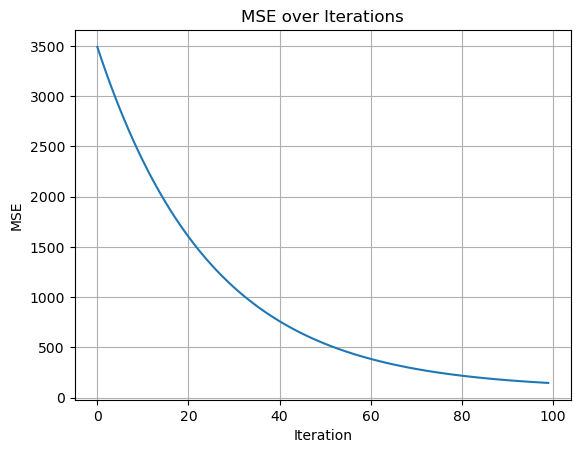

In [3]:
# Gradient Descent
def gradient_descent(X, y, lr=0.01, n_iters=100):
    m = len(y)
    w, b = 0.0, 0.0
    mse_history = []

    for i in range(n_iters):
        y_pred = w * X.flatten() + b
        dw = (2/m) * np.dot((y_pred - y), X.flatten())
        db = (2/m) * np.sum(y_pred - y)
        w -= lr * dw
        b -= lr * db
        mse_history.append(mse(y, y_pred))

    return w, b, mse_history

w_opt, b_opt, history = gradient_descent(X_normalized, y)

print(f"Optimized weights: w = {w_opt:.2f}, b = {b_opt:.2f}")
print(f"Final MSE: {history[-1]:.2f}")

# Plot convergence
plt.plot(history)
plt.title("MSE over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

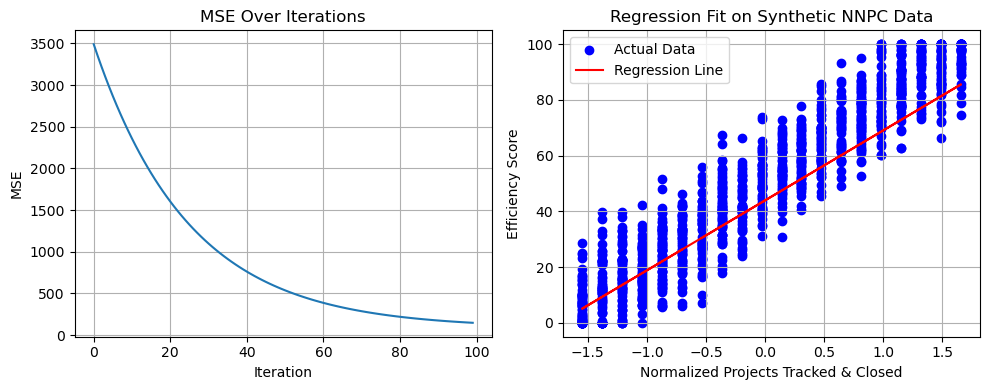

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load your synthetic dataset
df = pd.read_csv("nnpc_internship_efficiency_data.csv")

# Define feature and target columns
feature_col = "Projects_Tracked_Closed"
target_col = "Efficiency_Score"

# Extract values
X = df[[feature_col]].values
y = df[target_col].values

# Normalize the feature
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Gradient Descent Implementation
def gradient_descent(X, y, lr=0.01, n_iters=100):
    m = len(y)
    w, b = 0.0, 0.0
    mse_history = []

    for _ in range(n_iters):
        y_pred = w * X.flatten() + b
        dw = (2/m) * np.dot((y_pred - y), X.flatten())
        db = (2/m) * np.sum(y_pred - y)
        w -= lr * dw
        b -= lr * db
        mse_history.append(mean_squared_error(y, y_pred))

    return w, b, mse_history

# Run the optimizer
w_opt, b_opt, mse_history = gradient_descent(X_normalized, y)

# Predictions using final parameters
y_pred = w_opt * X_normalized.flatten() + b_opt

# Plotting
plt.figure(figsize=(10, 4))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(mse_history, label='MSE')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE Over Iterations")
plt.grid(True)

# Regression Line Plot
plt.subplot(1, 2, 2)
plt.scatter(X_normalized, y, color='blue', label='Actual Data')
plt.plot(X_normalized, y_pred, color='red', label='Regression Line')
plt.xlabel("Normalized Projects Tracked & Closed")
plt.ylabel("Efficiency Score")
plt.title("Regression Fit on Synthetic NNPC Data")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
